# CRIPS DM

# Bussines Understanding

- Problem
Kasus ini adalah tentang klaim asuransi. Yang rata-rata penduduknya dari negara Amerika Serikat yang berada di daerah timur lau, barat laut, tenggar dan barat daya.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/easonlai/sample-insurance-claim-prediction-dataset) bertujuan untuk memprediksi para peserta asuransi melakukan klaim asuransi atau tidak berdasarkan dataset yang sudah tersedia.

# Data Understnading

Dari pengumpulan data yang telah diambil mengenai prediksi klaim asuransi, terdapat 9 kolom yang berisi 2 kolom float64 dan 7 kolom integer. Jika menggunakan Logistic Regression, maka hanya kolom yang berisi float64 atau int64 saja yang bisa diolah. Berikut atribut-atribut nya :

0.sex : Mempresentasikan Jenis Kelamin 
1.bmi : Mempresentasikan Berat Badan Ideal 
2.steps : Mempresentasikan Rata-rata Berjalan Per Hari
3.children : Mempresentasikan Jumlah Anak/tanggunngan pemegang polis
4.smoker : Mempresentasikan Peserta Asuransi Merokok atau Tidak Merokok 
5.region : Mempresentasikan Area Tempat Tinggal Peserta Asuransi di AS 
6.charges : Mempresentasikan Biaya Medis Individu Yang Ditagih Oleh asuransi kesehatan


# Import Library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("insurance3r2.csv")

In [4]:
df.head(15)

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
5,31,0,25.740,8005,0,0,2,3756.62160,0
6,46,0,33.440,3002,1,0,2,8240.58960,1
7,37,0,27.740,8007,3,0,1,7281.50560,0
8,37,1,29.830,8002,2,0,0,6406.41070,0
9,60,0,25.840,5008,0,0,1,28923.13692,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


# DATA PREPARATION

# Pisahkan data atribut dengan label

In [6]:
X = df.drop(columns=['insuranceclaim'], axis=1)
Y = df['insuranceclaim']

In [7]:
print(X)

      age  sex     bmi  steps  children  smoker  region      charges
0      19    0  27.900   3009         0       1       3  16884.92400
1      18    1  33.770   3008         1       0       2   1725.55230
2      28    1  33.000   3009         3       0       2   4449.46200
3      33    1  22.705  10009         0       0       1  21984.47061
4      32    1  28.880   8010         0       0       1   3866.85520
...   ...  ...     ...    ...       ...     ...     ...          ...
1333   50    1  30.970   4008         3       0       1  10600.54830
1334   18    0  31.920   3003         0       0       0   2205.98080
1335   18    0  36.850   3008         0       0       2   1629.83350
1336   21    0  25.800   8009         0       0       3   2007.94500
1337   61    0  29.070   8008         0       1       1  29141.36030

[1338 rows x 8 columns]


In [8]:
print(Y)

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64


# Visualisasi Data

In [23]:
df_copy = df.copy(deep = True)
df_copy[['age','sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges']] = df_copy[['age','sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

age                  0
sex                662
bmi                  0
steps                0
children           574
smoker            1064
region             324
charges              0
insuranceclaim       0
dtype: int64


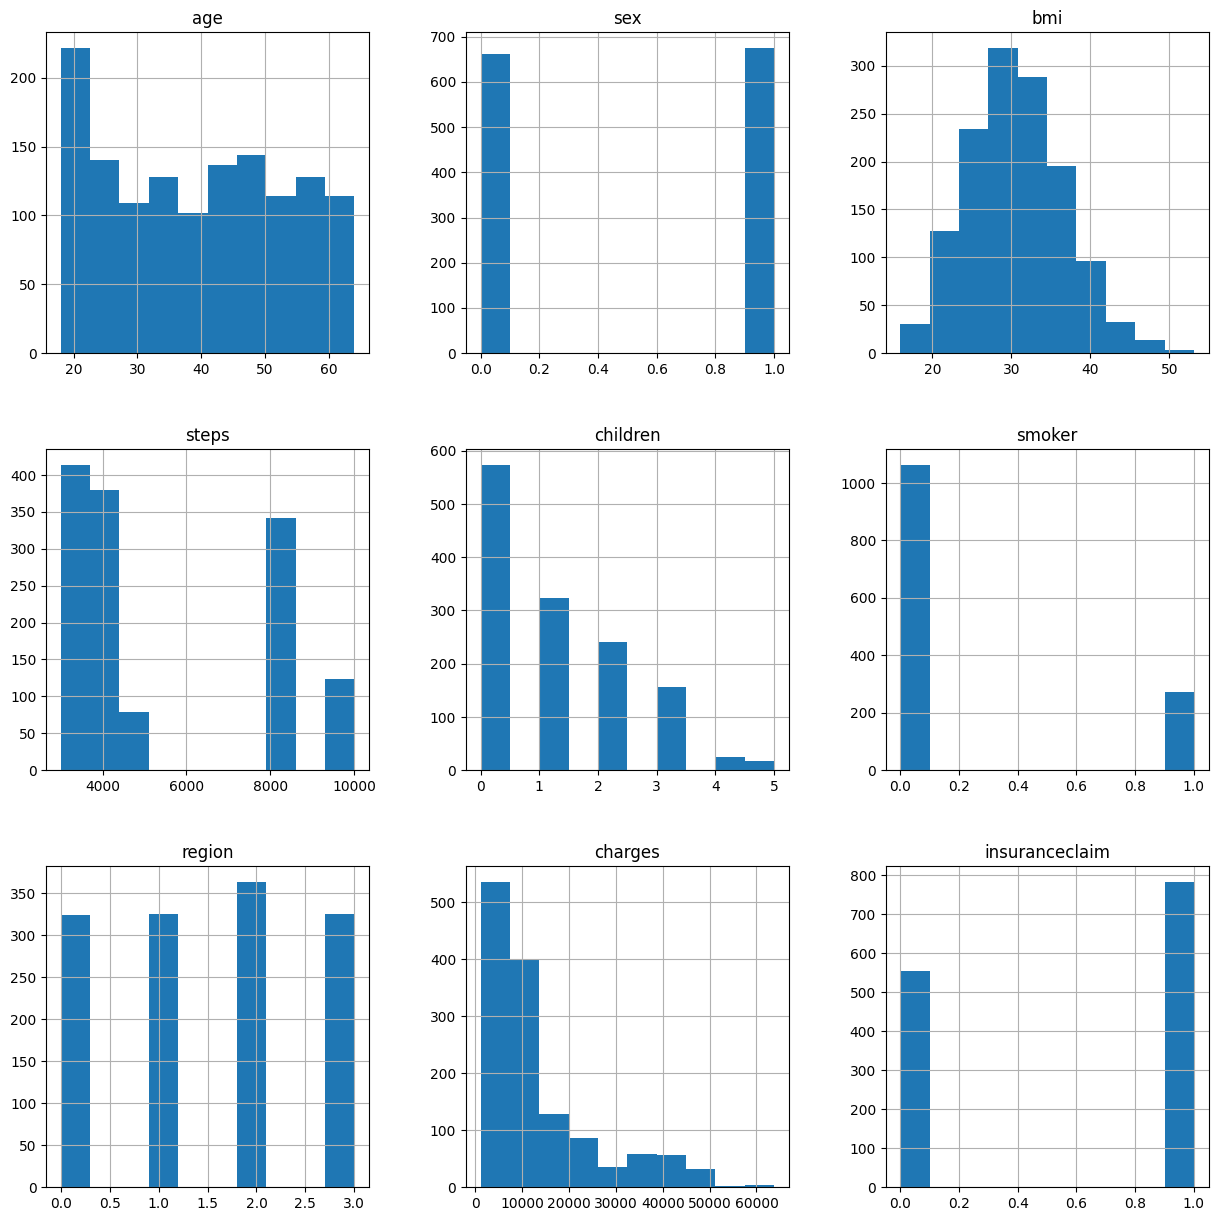

In [10]:
p = df.hist(figsize = (15,15))

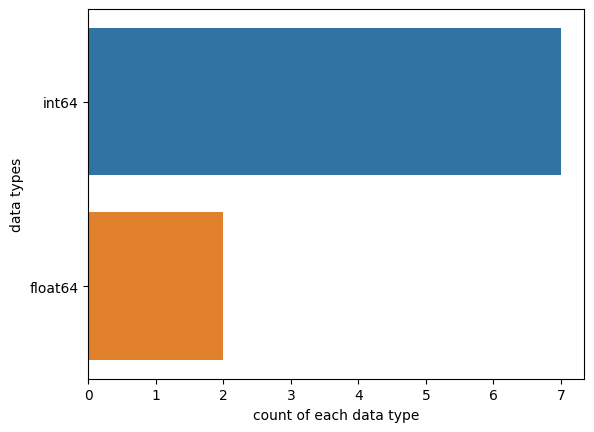

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

# Split data

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:

print(X.shape, x_train.shape, x_test.shape)

(1338, 8) (1070, 8) (268, 8)


# MODELING DATA

# Membuat Model Training

In [14]:
model = LogisticRegression()

In [15]:
model.fit(x_train, y_train)

LogisticRegression()

# EVALUATION

# Evaluasi Model

In [16]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [17]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8514018691588785


In [18]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [19]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.8432835820895522


# Model Prediksi

In [20]:
input_data = (30, 1, 33.770, 3008, 1, 0, 2, 1725.55230)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
predict = model.predict(data_reshaped)
print(predict)

if (predict[0] == 0):
    print('Peserta Melakukan Klaim Asuransi')
else:
    print('Peserta Tidak Melakukan Klaim Asuransi')

[1]
Peserta Tidak Melakukan Klaim Asuransi


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# DEPLOYMENT

# Save Model

In [22]:
import pickle

filename = 'insurance3r2.sav'
pickle.dump(model, open(filename, 'wb'))